In [1]:
#Import libraries
from numpy import *
from scipy.sparse import diags
from matplotlib import animation as animation
from matplotlib import pyplot 
from scipy.integrate import odeint
from random import *
from pylab import *

#plot inline
%matplotlib inline

In [2]:
# parametros
lamda=0.1
gama=0
K=3

#finite difference approximations steps
#dx=0.25
#dt=0.25

#end of time and space arrays
T=150
R=350

#size of the arrays
m=500#int(T/dt)
n=500#int(R/dx)


#time array
t=linspace(0,T,m,endpoint=True)

#space array
x=linspace(0,R,n,endpoint=True)

dt=t[1]-t[0]
dx=x[1]-x[0]


In [3]:
#Initializes sol. matrix with initial conditions
def initCN(x,t):    
    m=len(t)
    n=len(x)
    
    C=zeros((m,n))
    N=zeros((m,n))
    
    #Initial conditions
    C[0,:]=array([1 if k<100 else 0 for k in x])
    
    return [C,N]

In [43]:
def fieldC(c,t,n):
    dc=dot(L,transpose(c))+c*(1-c-gama*n)-lamda*c*(1-K*n)
    
    return dc

def fieldN(n,t,c):
    dn=lamda*c*(1-K*n)
    
    return dn

# Considerando difusión

In [32]:
#Constructs sparse matrix
def discretizationMatrix(dx,m,n):
    diagonals=[]
    
    diagonals.append(ones((1,n))[0]*(-2/pow(dx,2)))
    diagonals.append((ones((1,n-1))[0])*(1/pow(dx,2)))
    diagonals.append((ones((1,n-1))[0])*(1/pow(dx,2)))
    diagonals.append(zeros((1,n-2))[0])
    diagonals.append(zeros((1,n-2))[0])
    
    #diagonals[0][0]=-3/(2*power(dx,2))
    #diagonals[0][n-1]=-1/(2*power(dx,2))
    
    #diagonals[1][1]=2/power(dx,2)
    
    #diagonals[2][n-2]=2/power(dx,2)
    
    #diagonals[3][0]=-1/(2*power(dx,2))
    
    #diagonals[4][n-3]=-3/(2*power(dx,2))
    
    diagonals[2][n-2]=2/pow(dx,2)
    diagonals[2][n-2]=2/pow(dx,2)
    
    L=diags(diagonals,[0,-1,1,2,-2])*eye(n)
    
    return L



def fkpp(u, t, n,dx):
    
    # spatial second derivative
    d2x = -2 * u
    d2x[1:-1] += u[2:] + u[:-2]
    d2x[0] += u[1]
    d2x[-1] += u[-2]
    d2x = d2x/(dx*dx)
    #add the reaction terms
    du = u*(1-u-gama*n)-lamda*u*(1-K*n) + d2x
    return du





In [33]:
def solveODE(n,t):   
    C=CN[0]
    N=CN[1]
    
    C_sol=odeint(fieldC,C[0,:],t,args=(N[0,:],1))
    N_sol=odeint(fieldN,N[0,:],t,args=(C[0,:],))
    
    return [C_sol,N_sol]

In [45]:
CN=initCN(x,t)
L=discretizationMatrix(dx,m,n)

In [46]:
CN_sol=solveODE(n,t)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [47]:
C_sol=CN_sol[0]
N_sol=CN_sol[1]

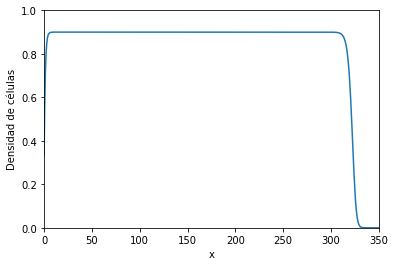

In [48]:
fig=plt.figure()
ax=plt.axes(xlim=(0,350),ylim=(0,1))
ax.set_xlabel('x')
ax.set_ylabel('Densidad de células')
ax.plot(x,C_sol[400])


In [ ]:
# the size of the spatial domain
# his is actual size, such as "kilometres"
L = 50.
a = -L
b = L
t0 = 0.0
t1 = 20.0*2

# the number of points in the grid
#grid_size = 100
NX = 401*2
NT = 101

# the integration times
ts = linspace(t0, t1, NT)
h = ts[1]-ts[0]
# the grid
xm = linspace(a,b,NX)
dx = xm[1]-xm[0]

kc = 0.5*h/(dx*dx)

In [ ]:
def AblowitzZeppetella(x,t):
    return 1./((1+exp(-5/6*t+sqrt(6)*xm/6))**2)

u0 = AblowitzZeppetella(xm,ts[0])

def fkpp(u, t, dx, d):
    # spatial second derivative
    d2x = -2 * u
    d2x[1:-1] += u[2:] + u[:-2]
    d2x[0] += u[1]
    d2x[-1] += u[-2]
    d2x = d2x/(dx*dx)
    #add the reaction terms
    du = u * (1. - u) + d2x
    return du


In [ ]:
shape(u0)

In [ ]:
u = odeint(fkpp, u0, ts, (dx,1))

# Sin difusión

In [35]:
def field(CN,t):
    c=CN[0]
    n=CN[1]
    
    C=c*(1-c-gama*n)-lamda*c*(1-K*n)
    N=lamda*c*(1-K*n)
    
    return [C,N]


In [36]:
#steady states
xstar=[0,0]
#xstar = [1-1/K,1/K]]

In [37]:
def init_cond(xstar,eps,n):
    xinit = xstar + eps*rand(n,2)
    
    return xinit

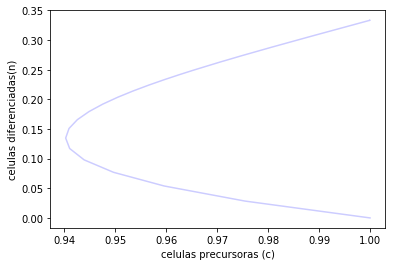

In [73]:
init_state=init_cond(xstar,0.3,1)[0]
#sol=odeint(field,init_state,t)
sol=odeint(field,[1,0],t)


fig=figure()
xlabel("celulas precursoras (c)")
ylabel("celulas diferenciadas(n)")

plot(sol[:,0],sol[:,1],'b-',alpha=0.2)

def animate(i):
    plot(sol[0:i,0],sol[0:i,1],'b-')
    
ani=animation.FuncAnimation(fig,animate,interval=1)
show()


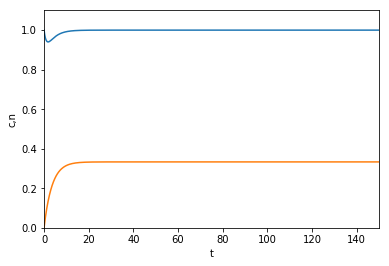

In [78]:
fig2=figure()
xlabel("t")
ylabel("c,n")
xlim(0,150)
ylim(0,1.1)
plot(t,sol[:,0],t,sol[:,1])

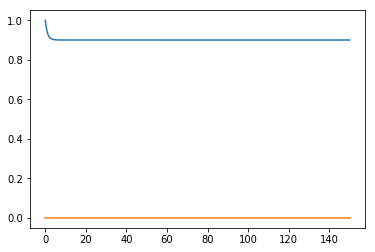

In [70]:
plot(t,C_sol[:,50],t,N_sol[:,300])

In [ ]:
init_state

In [ ]:
pyplot.plot(x,CN_sol[0][300])

In [ ]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column

In [ ]:
figure={
    'data':[],
    'layout':{'title':'c vs. n',
              'xaxis':{'range':[0,1],'autorange':False},
              'yaxis':{'range':[0,1],'autorange':True},
              'updatemenus': [{
                   'buttons': [
                       {'args': [None],
                        'label': 'Play',
                        'method': 'animate'}
               ],
               'pad': {'r': 10, 't': 87},
               'showactive': False,
               'type': 'buttons'
                }]},
    'frames':


}